In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import brian2 as b2 
from brian2tools import *

In [3]:
b2.prefs.codegen.target = "numpy"

In `brian`, we can work with units:

In [4]:
3000*b2.mV + 1*b2.volt

4. * volt

## LIF
The leaky integrate and fire neuron is defined by the equation:
\begin{align}
    \tau\frac{dV}{dt} = -V
\end{align}

In [47]:
tau = 10*b2.ms
f = 75*b2.Hz

eqs = '''
dV/dt = (1.5 + sin(2*pi*f*t)-V)/tau : 1
'''

G = b2.NeuronGroup(1, eqs, 
                   threshold = 'V>1',
                   reset = 'V=rand()',
                   method='euler')
G.V = 0

M = b2.StateMonitor(G, 'V', record = True)

b2.run(50*b2.ms)

For visualization, we can access the time by `M.t` and the voltage by `M.V`

In [48]:
print(M.V.shape)
print(M.t.shape)

(1, 500)
(500,)


In [49]:
print(type(M.V))
print(type(M.t))

<class 'numpy.ndarray'>
<class 'brian2.core.variables.VariableView'>


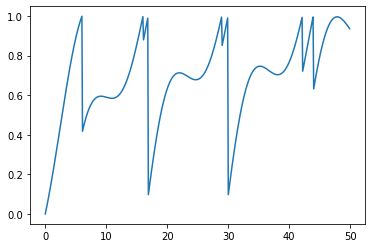

In [50]:
plt.plot(M.t/b2.ms, M.V[0]);

# Instead of above code, we can use brian built-in function `brian_plot(M);`

## Adaptive Threshold

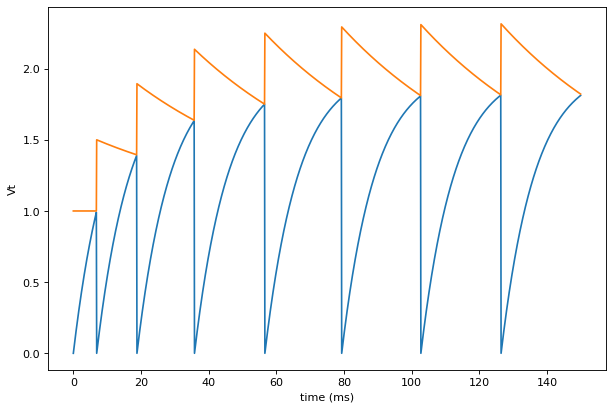

In [95]:
tau = 10 * b2.ms
tau_t = 50 * b2.ms
f = 100 * b2.Hz

eqs = '''
dV/dt = (2 - V)/tau : 1
dVt/dt = (1-Vt)/tau_t : 1
'''

G = b2.NeuronGroup(1, eqs, 
                   threshold = 'V>Vt',
                   reset = 'V=0; Vt += 0.5',
                   method='euler')
G.V = 0
G.Vt = 1

M = b2.StateMonitor(G, 'V', record = True)
Mt = b2.StateMonitor(G, 'Vt', record = True)

b2.run(150 * b2.ms)


plt.figure(figsize = (9, 6), dpi = 80)
brian_plot(M)
brian_plot(Mt);